# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/rosanajurdi/Data_Visualization_Course/refs/heads/main/lab-sessions/datasets/athlete_events.csv"
df = pd.read_csv(url)

df_2016 = df[df['Year'] == 2016].copy()

top_sports = df_2016[df_2016['Medal'].notna()]['Sport'].value_counts().head(5)
top_sports_names = top_sports.index.tolist()

print("Top 5 sports by medal count in 2016:")
print(top_sports)

Top 5 sports by medal count in 2016:
Sport
Athletics    192
Swimming     191
Rowing       144
Football     106
Hockey        99
Name: count, dtype: int64


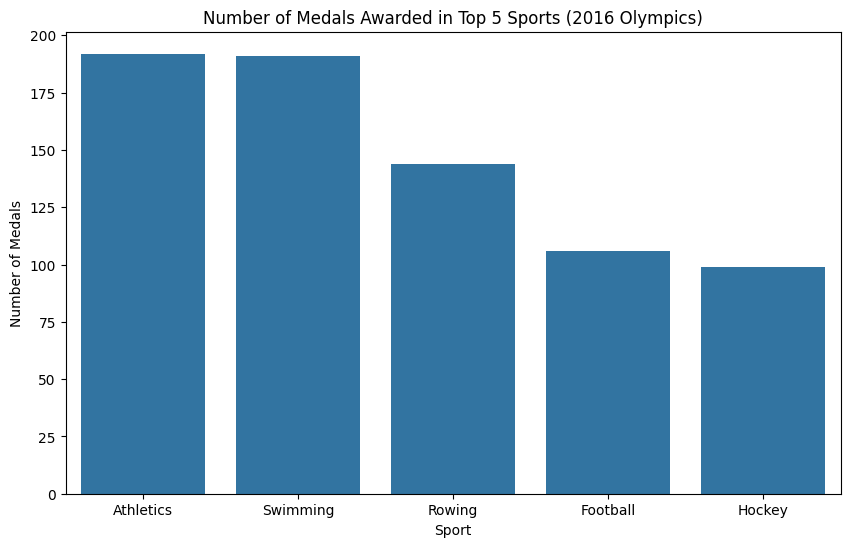

In [2]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sports.index, y=top_sports.values)
plt.title('Number of Medals Awarded in Top 5 Sports (2016 Olympics)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.show()

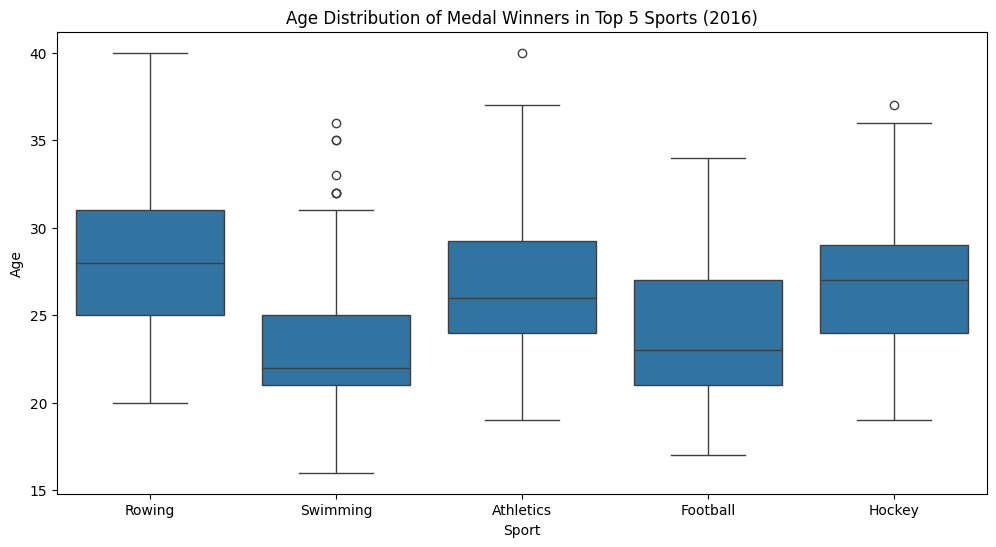

In [4]:
medal_winners_top = df_2016[
    (df_2016['Sport'].isin(top_sports_names)) & 
    (df_2016['Medal'].notna())
]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Age', data=medal_winners_top)
plt.title('Age Distribution of Medal Winners in Top 5 Sports (2016)')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.show()


Top National Teams by Medals in Top 5 Sports:
NOC
USA    127.0
GER     88.0
GBR     69.0
CAN     45.0
AUS     43.0
NED     34.0
JAM     30.0
SWE     21.0
FRA     20.0
BRA     19.0
dtype: float64


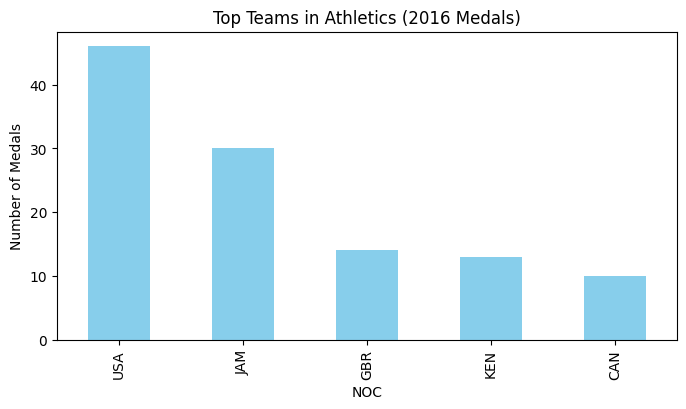

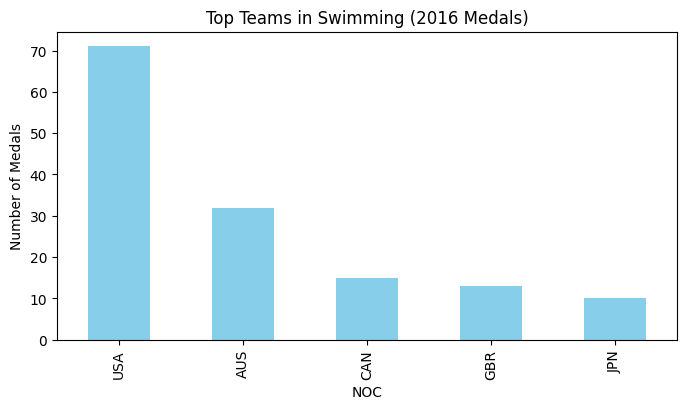

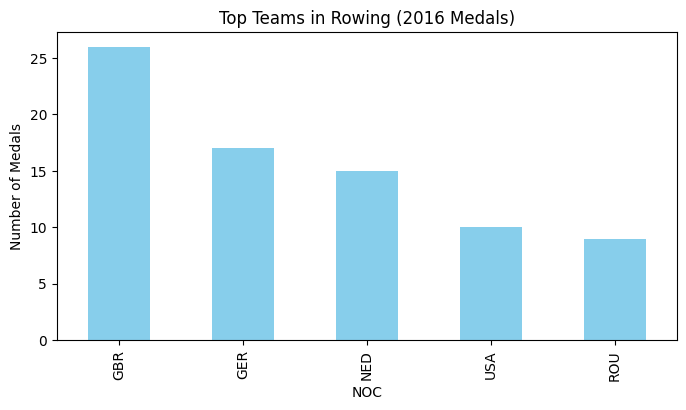

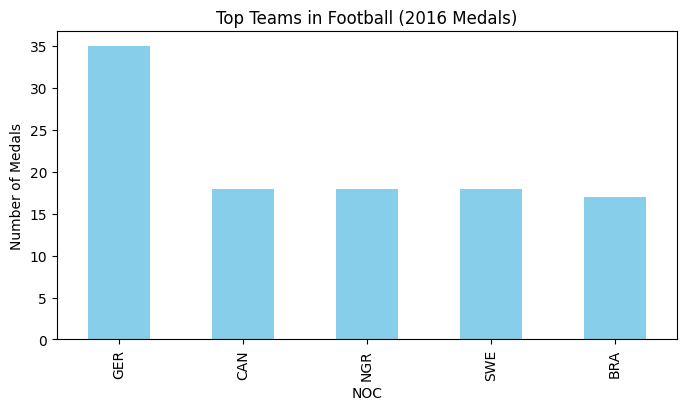

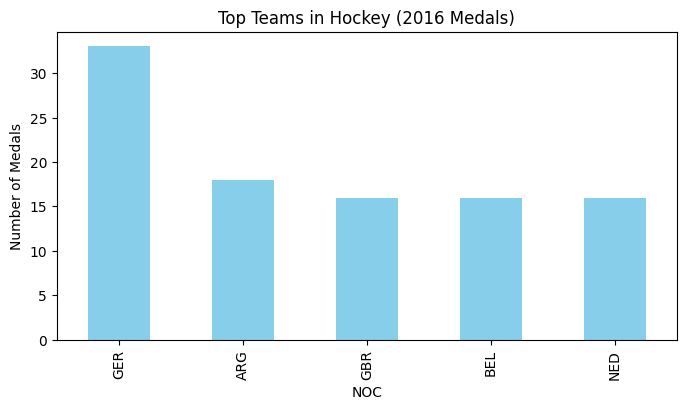

In [5]:
team_medals = medal_winners_top.groupby(['NOC', 'Sport'])['Medal'].count().unstack().fillna(0)
top_teams = team_medals.sum(axis=1).sort_values(ascending=False).head(10)

print("\nTop National Teams by Medals in Top 5 Sports:")
print(top_teams)

for sport in top_sports_names:
    sport_teams = team_medals[sport].sort_values(ascending=False).head(5)
    plt.figure(figsize=(8, 4))
    sport_teams.plot(kind='bar', color='skyblue')
    plt.title(f'Top Teams in {sport} (2016 Medals)')
    plt.ylabel('Number of Medals')
    plt.show()

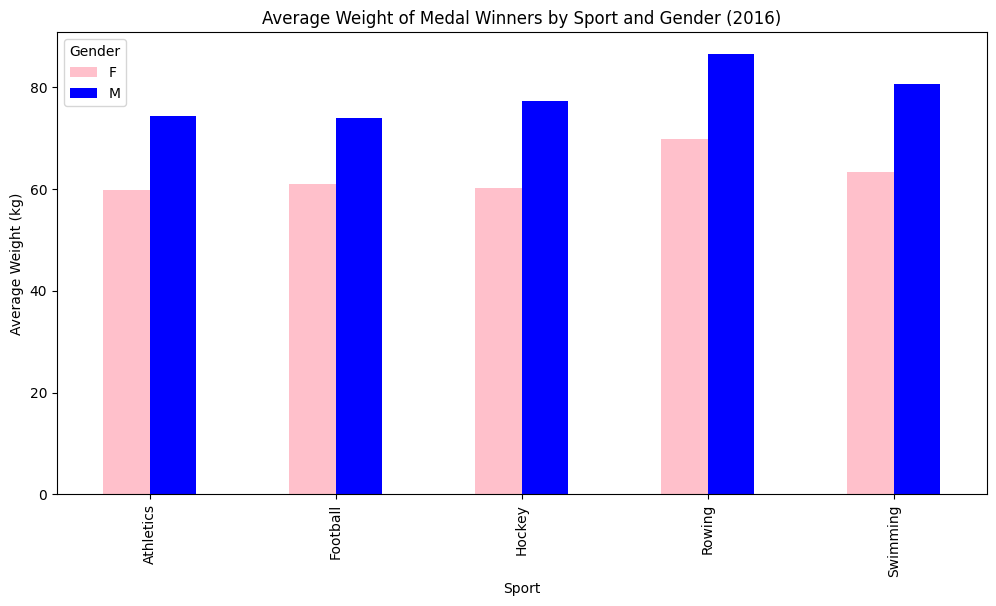

In [6]:
weight_trend = df_2016[
    (df_2016['Sport'].isin(top_sports_names)) & 
    (df_2016['Weight'].notna())
].groupby(['Sport', 'Sex'])['Weight'].mean().unstack()

# Plot
weight_trend.plot(kind='bar', figsize=(12, 6), color=['pink', 'blue'])
plt.title('Average Weight of Medal Winners by Sport and Gender (2016)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.legend(title='Gender')
plt.show()

Top 5 sports by medal count in 2016:
Sport
Athletics    192
Swimming     191
Rowing       144
Football     106
Hockey        99
Name: count, dtype: int64


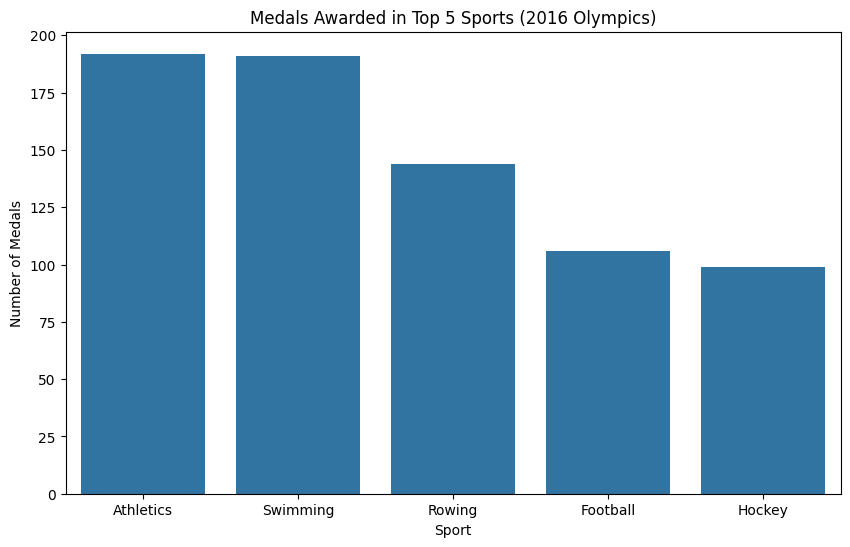

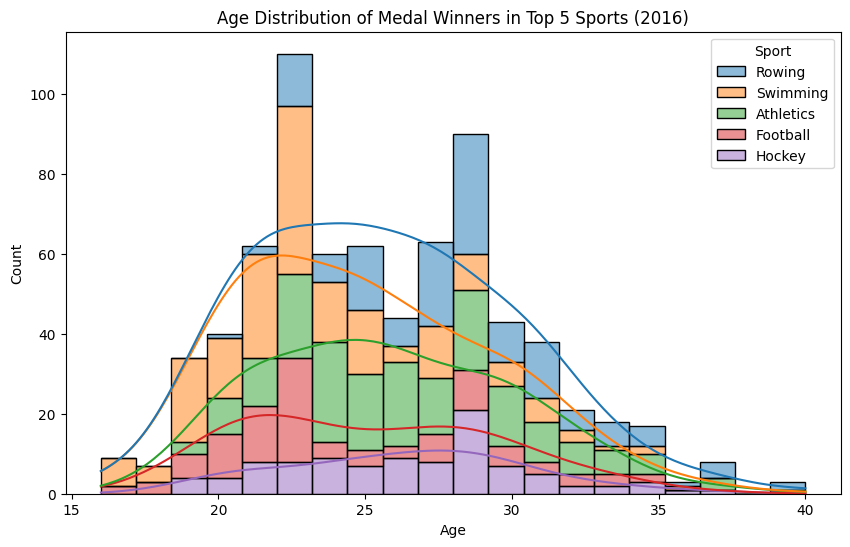

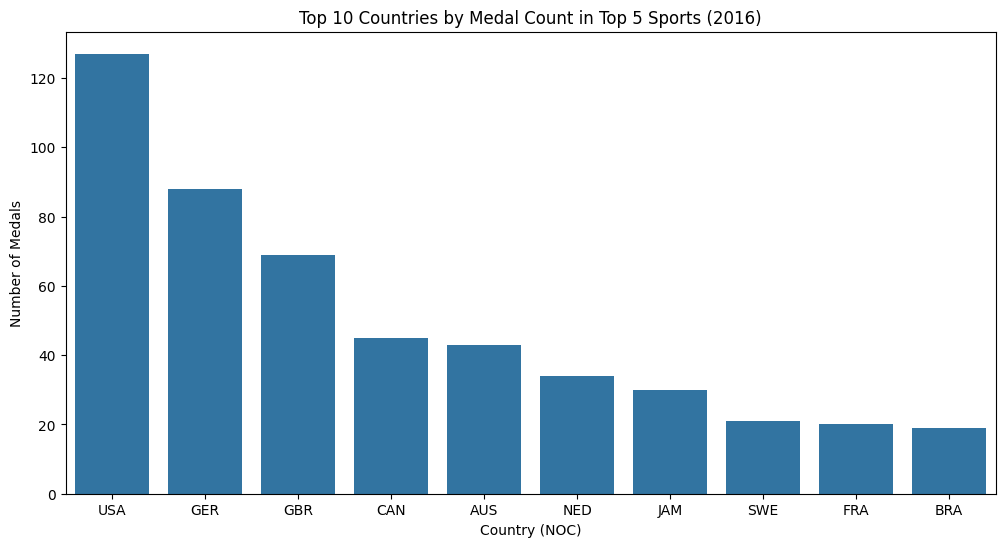

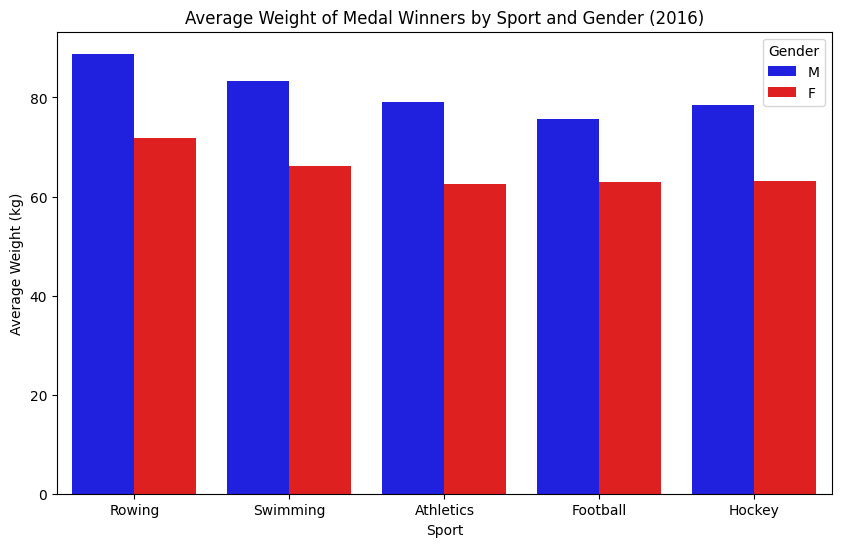

In [8]:
#High-level steps

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/rosanajurdi/Data_Visualization_Course/refs/heads/main/lab-sessions/datasets/athlete_events.csv"
df = pd.read_csv(url)

#2016 medal winners
medal_winners_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())].copy()

#Count medals per sport
medals_per_sport = medal_winners_2016['Sport'].value_counts()

#Get top 5 sports and filter 
top_5_sports = medals_per_sport.head(5).index.tolist()
top_sports_data = medal_winners_2016[medal_winners_2016['Sport'].isin(top_5_sports)]

print("Top 5 sports by medal count in 2016:")
print(medals_per_sport.head(5))

#Plot medals in top 5 sports
plt.figure(figsize=(10, 6))
sns.countplot(data=top_sports_data, x='Sport', order=top_5_sports)
plt.title('Medals Awarded in Top 5 Sports (2016 Olympics)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.show()

#Age distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=top_sports_data, x='Age', bins=20, kde=True, hue='Sport', multiple='stack')
plt.title('Age Distribution of Medal Winners in Top 5 Sports (2016)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

#Medals by country
plt.figure(figsize=(12, 6))
medals_by_country = top_sports_data['NOC'].value_counts().head(10)
sns.barplot(x=medals_by_country.index, y=medals_by_country.values)
plt.title('Top 10 Countries by Medal Count in Top 5 Sports (2016)')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')

plt.show()

#Average weight by gender
plt.figure(figsize=(10, 6))
weight_data = top_sports_data.dropna(subset=['Weight'])
sns.barplot(data=weight_data, x='Sport', y='Weight', hue='Sex', 
            palette={'M':'blue', 'F':'red'},errorbar=None)
plt.title('Average Weight of Medal Winners by Sport and Gender (2016)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.legend(title='Gender')
plt.show()